# Import Library

In [2]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,optimizers,datasets
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [4]:
model = tf.keras.Sequential([
tf.keras.layers.Dense(units=84, input_shape=[10,10,1]),
tf.keras.layers.Dense(52, activation='relu'),
tf.keras.layers.Dense(52, kernel_initializer=tf.keras.initializers.he_normal),
tf.keras.layers.Dense(52, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
tf.keras.layers.Dense(30, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10, 10, 84)        168       
                                                                 
 dense_4 (Dense)             (None, 10, 10, 52)        4420      
                                                                 
 dense_5 (Dense)             (None, 10, 10, 52)        2756      
                                                                 
 dense_6 (Dense)             (None, 10, 10, 52)        2756      
                                                                 
 dense_7 (Dense)             (None, 10, 10, 30)        1590      
                                                                 
Total params: 11,690
Trainable params: 11,690
Non-trainable params: 0
_________________________________________________________________


In [5]:
import numpy as np

#membuat variable x sebagai atribute dan y sebagai label
x = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], dtype=float)
y = np.array([2.0, 4.0, 6.0, 8.0, 10.0, 12.0], dtype=float)

#membuat sequential dimana hanya 1 dense layer yang dibutuhkan
model = tf.keras.Sequential([
tf.keras.layers.Dense(units=1, input_shape=[1])
])

#model di kompilasi dengan optimizer sgd dan loss MSE
model.compile(optimizer='sgd', loss='mse')

#model di training dengan epoch yang dapat kita atur
model.fit(x, y, epochs=50)

#mencoba prediksi y dengan model yang telah dilatih
y_pred = model.predict([6.0, 7.0, 8.0])
print(y_pred)

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 71.5418
Epoch 2/50
1/1 [==============================] - 0s 44ms/step - loss: 33.1353
Epoch 3/50
1/1 [==============================] - 0s 15ms/step - loss: 15.3594
Epoch 4/50
1/1 [==============================] - 0s 15ms/step - loss: 7.1321
Epoch 5/50
1/1 [==============================] - 0s 17ms/step - loss: 3.3240
Epoch 6/50
1/1 [==============================] - 0s 15ms/step - loss: 1.5614
Epoch 7/50
1/1 [==============================] - 0s 13ms/step - loss: 0.7454
Epoch 8/50
1/1 [==============================] - 0s 11ms/step - loss: 0.3676
Epoch 9/50
1/1 [==============================] - 0s 13ms/step - loss: 0.1925
Epoch 10/50
1/1 [==============================] - 0s 19ms/step - loss: 0.1114
Epoch 11/50
1/1 [==============================] - 0s 14ms/step - loss: 0.0736
Epoch 12/50
1/1 [==============================] - 0s 14ms/step - loss: 0.0560
Epoch 13/50
1/1 [==============================] - 0s 14ms/s

## Prediksi Data yang baru

In [6]:
new_data = np.array([4.0,5.0,7.0])
y_pred = model.predict(new_data)
print(y_pred)

1/1 [==============================] - 0s 54ms/step
[[ 8.026319]
 [ 9.932726]
 [13.745541]]


# Klasifikasi dengan Mnist Dataset

In [7]:
(x_train_raw,y_train_raw), (x_test_raw,y_test_raw) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


## Melakukan Encoding

In [8]:
num_class = 10 

#One Hot Encoding
y_train = keras.utils.to_categorical(y_train_raw,num_class)
y_test = keras.utils.to_categorical(y_test_raw,num_class)

print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


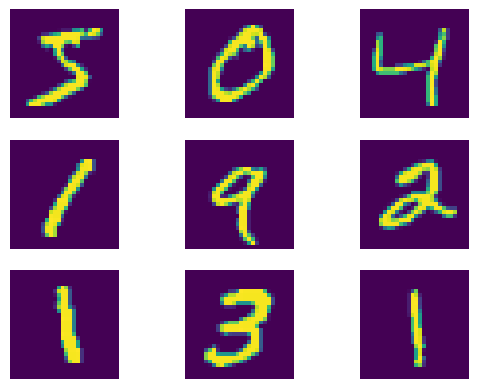

In [9]:
plt.figure
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train_raw[i])
  plt.axis('off')

plt.show()

In [10]:
x_train = x_train_raw.reshape(60000,784)
x_test = x_test_raw.reshape(10000,784)

In [11]:
# Normalisasi
x_train = x_train.astype('float64')/255

In [12]:
# Membuat model mnist dataset
model_mnist = keras.Sequential()

In [13]:
# Input Layer
model_mnist.add(layers.Dense(512,activation='relu',input_dim=784))

# Hidden Layer
model_mnist.add(layers.Dense(256,activation='relu'))
model_mnist.add(layers.Dense(128,activation='relu'))

#Output Layer
model_mnist.add(layers.Dense(10,activation='softmax'))

In [14]:
model_mnist.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               401920    
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


# Compile Model

In [16]:
Optimizer = optimizers.Adam(learning_rate=0.0001)
model_mnist.compile(loss=keras.losses.categorical_crossentropy,optimizer=Optimizer,
                    metrics=['accuracy'])

In [17]:
#Training Model
model_mnist.fit(x_train,y_train, epochs=20, batch_size=128)

Epoch 1/20
469/469 [==============================] - 16s 31ms/step - loss: 0.5447 - accuracy: 0.8608
Epoch 2/20
469/469 [==============================] - 15s 31ms/step - loss: 0.1924 - accuracy: 0.9445
Epoch 3/20
469/469 [==============================] - 15s 32ms/step - loss: 0.1413 - accuracy: 0.9592
Epoch 4/20
469/469 [==============================] - 16s 35ms/step - loss: 0.1129 - accuracy: 0.9673
Epoch 5/20
469/469 [==============================] - 15s 32ms/step - loss: 0.0919 - accuracy: 0.9733
Epoch 6/20
469/469 [==============================] - 16s 34ms/step - loss: 0.0767 - accuracy: 0.9776
Epoch 7/20
469/469 [==============================] - 15s 32ms/step - loss: 0.0646 - accuracy: 0.9814
Epoch 8/20
469/469 [==============================] - 15s 32ms/step - loss: 0.0552 - accuracy: 0.9843
Epoch 9/20
469/469 [==============================] - 15s 32ms/step - loss: 0.0465 - accuracy: 0.9868
Epoch 10/20
469/469 [==============================] - 15s 32ms/step - loss: 0.039

In [18]:
#Evaluate Model
score = model_mnist.evaluate(x_test,y_test, verbose=1)
print(f'Test Loss : {score[0]}')
print(f'Test Akurasi : {round(score[1] * 100,2)}%')

313/313 [==============================] - 4s 11ms/step - loss: 13.8211 - accuracy: 0.9796
Test Loss : 13.821109771728516
Test Akurasi : 97.96%
